<a href="https://colab.research.google.com/github/MakhovaAnastasia/MakhovaA_22_23/blob/main/cursovaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from datetime import date

In [2]:

# import all stock prices 
df = pd.read_csv('/content/drive/MyDrive/df/prices-split-adjusted.csv')
df.info()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB

number of different stocks:  501
['NVDA', 'ECL', 'IP', 'HRL', 'ETR', 'O', 'STX', 'LMT', 'UNM', 'ITW', 'LEN', 'V', 'BCR', 'BIIB', 'DIS', 'EMN', 'HES', 'SRCL', 'AES', 'MON', 'WBA', 'CME', 'BEN', 'BLL', 'XEC', 'BDX', 'RHT', 'DTE', 'UAL', 'FB', 'CB', 'FAST', 'MAA', 'CSRA', 'KSS', 'INTU', 'HUM', 'STI', 'XL', 'LRCX', 'NWL', 'CNC', 'SNI', 'WU', 'DUK', 'MA', 'AYI', 'MLM', 'SPG', 'ALB', 'PSX', 'APD', 'AVY', 'ILMN', 'LUK', 'KLAC', 'ROP', 'VAR', 'NBL', 'ALK', 'HCA', 'DPS', 'AAL', 'DISCK', 'HST', 'APA

In [3]:
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'],inplace=True)

In [4]:
df[df.symbol == 'NVDA'].head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0
2010-01-05,NVDA,18.420000,18.760000,18.420000,18.959999,18216200.0
2010-01-06,NVDA,18.750000,18.879999,18.570000,18.920000,16229200.0
2010-01-07,NVDA,18.780001,18.510000,18.370001,18.860001,13694800.0
2010-01-08,NVDA,18.360001,18.549999,18.250000,18.680000,11954200.0


In [5]:
#choose one stock symbol
#df.drop(df[df.symbol != 'NVDA'].index, inplace=True)

In [6]:
df=df[df.symbol == 'NVDA']

<function matplotlib.pyplot.show(close=None, block=None)>

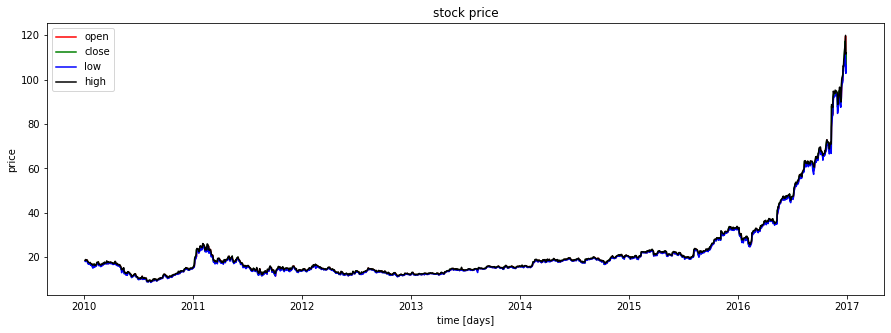

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5));
plt.plot(df.index,df.open.values, color='red', label='open')
plt.plot(df.index,df.close.values, color='green', label='close')
plt.plot(df.index,df.low.values, color='blue', label='low')
plt.plot(df.index,df.high.values, color='black', label='high')
plt.title('stock price')
#plt.xticks(pd.to_datetime(pd.date_range(df.index[0],df.index[1761])), freq="MS")
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show

In [8]:
#choose time period
#df.drop(df[df.index < '2014-12-31'].index,inplace=True)

In [9]:
df= df[(df.index < '2010-05-05')]

<function matplotlib.pyplot.show(close=None, block=None)>

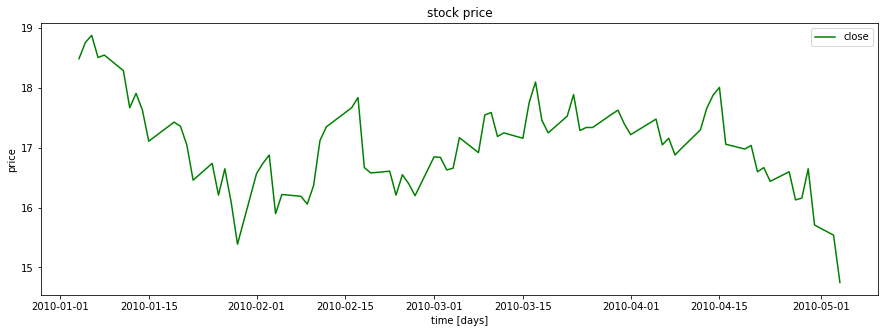

In [10]:
#выберем временной отрезок

plt.figure(figsize=(15, 5));
#plt.plot(df.index,df.open.values, color='red', label='open')
plt.plot(df.index,df.close.values, color='green', label='close')
#plt.plot(df.index,df.low.values, color='blue', label='low')
#plt.plot(df.index,df.high.values, color='black', label='high')
plt.title('stock price')
#plt.xticks(pd.to_datetime(pd.date_range(df.index[0],df.index[1761])), freq="MS")
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show

In [11]:
eps = 0.0000001 #вводим погрешность, чтобы определить, когда тренд боковой

df['trend'] = df['close'].diff(periods=1)
#       тренд:
#    восходящий =  1
#    боковой    =  0
#    нисходящий = -1
df['trend'] = np.where(df['trend'].abs() <eps , 0, np.sign(df['trend']))
df['trend'] = df['trend'].shift(-1)
df.tail()

,symbol,open,close,low,high,volume,trend
date,,,,,,,
2010-04-28,NVDA,16.120001,16.16,15.83,16.389999,16804100.0,1.0
2010-04-29,NVDA,16.209999,16.65,15.97,16.670000,24678200.0,-1.0
2010-04-30,NVDA,16.450001,15.71,15.70,16.480000,26701200.0,-1.0
2010-05-03,NVDA,15.790000,15.54,15.30,15.880000,26974300.0,-1.0
2010-05-04,NVDA,15.300000,14.75,14.53,15.330000,32784400.0,NaN


In [12]:
from datetime import timedelta

<function matplotlib.pyplot.show(close=None, block=None)>

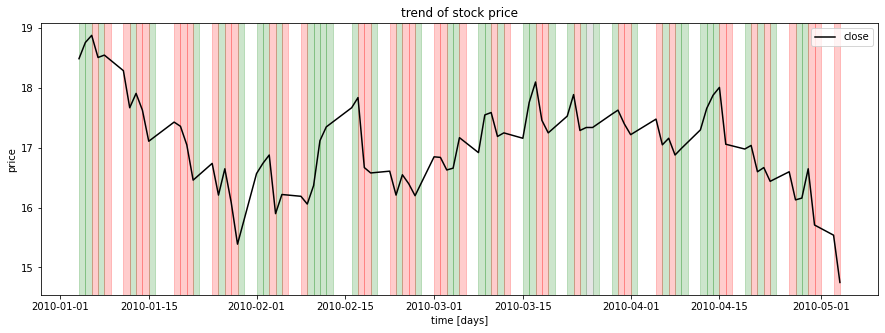

In [16]:
plt.figure(figsize=(15, 5));
start_up = df[df.trend ==1].index.to_list()
for i in range(len(start_up)):
  plt.axvspan(start_up[i],start_up[i] + timedelta(days = 1) ,color='green',alpha= 0.2)
start_down = df[df.trend == -1].index.to_list()
for i in range(len(start_down)):
  plt.axvspan(start_down[i],start_down[i] + timedelta(days = 1) ,color='red',alpha= 0.2)
start_flat = df[df.trend == 0].index.to_list()
for i in range(len(start_flat)):
  plt.axvspan(start_flat[i],start_flat[i] + timedelta(days = 1) ,color='gray',alpha= 0.2)
#plt.plot(df.index,df.trend, color='0.8', label='trend')
#plt.fill_betweenx()
plt.plot(df.index,df.close.values, color='black', label='close')
plt.title('trend of stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
plt.show

In [14]:
display(df)

,symbol,open,close,low,high,volume,trend
date,,,,,,,
2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0,1.0
2010-01-05,NVDA,18.420000,18.760000,18.420000,18.959999,18216200.0,1.0
2010-01-06,NVDA,18.750000,18.879999,18.570000,18.920000,16229200.0,-1.0
2010-01-07,NVDA,18.780001,18.510000,18.370001,18.860001,13694800.0,1.0
2010-01-08,NVDA,18.360001,18.549999,18.250000,18.680000,11954200.0,-1.0
...,...,...,...,...,...,...,...
2010-04-28,NVDA,16.120001,16.160000,15.830000,16.389999,16804100.0,1.0
2010-04-29,NVDA,16.209999,16.650000,15.970000,16.670000,24678200.0,-1.0
2010-04-30,NVDA,16.450001,15.710000,15.700000,16.480000,26701200.0,-1.0
